<a href="https://colab.research.google.com/github/IA2122/practica-5-paochoa/blob/main/practica5_adicional3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 5. Ejercicio Adicional 3. Bloques de una red neuronal

Este notebook tiene como objetivo proporcionar intuiciones sobre las distintas nociones que son necesarias para entender las redes neuronales, pero sin resultar excesivamente técnicos. En concreto, se intentará evitar en la medida de lo posible la notación matemática, que no es estrictamente necesaria para entender cómo funcionan las redes neuronales. 

Para comenzar, empezaremos con un ejemplo práctico de una red neuronal, y a continuación iremos explicando los conceptos que van apareciendo. Este notebook está basado en el libro "Deep Learning with Python" de F. Chollet. 

## Un primer vistazo a una red neuronal

Para este ejemplo vamos a utilizar de nuevo el dataset de los dígitos (MNIST) que ya hemos visto en prácticas anteriores. El problema que se intenta resolver con este dataset consiste en clasificar imágenes en escala de grises de dígitos manuscritos (de tamaño 28x28) en 10 categorías (del 0 al 9). Este dataset se considera como el 'Hello world' del aprendizaje supervisado y se utiliza de manera habitual para probar nuevos algoritmos. 

Para este ejemplo vamos a utilizar la librería ```keras```, una librería de aprendizaje profundo de la cual nosotros utilizaremos únicamente la parte de redes neuronales. 

### Cargando el dataset MNIST

El dataset MNIST viene precargado en Keras en la forma de 4 vectores de Numpy. 

In [1]:
from keras.datasets import mnist
(imagenes_entrenamiento,etiquetas_entrenamiento),(imagenes_test,etiquetas_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


##### Ejercicio
Las imágenes se codifican como arrays de Numpy, y las etiquetas como un array de dígitos. ¿Cuántas imágenes hay de entrenamiento? ¿y de test?

In [4]:
len(imagenes_entrenamiento)

60000

In [5]:
len(imagenes_test)

10000

Vamos ahora a entrenar el modelo. El proceso será el siguiente. Comenzaremos alimentando a la red neuronal con los datos de entrenamiento (almacenados en ```imagenes_entrenamiento``` y ```etiquetas_entrenamiento```), de este modo la red aprenderá a asociar imágenes con etiquetas. Finalmente, pediremos a la red que produzca predicciones para las imágenes de test y verificaremos que los resultados cuadran con las etiquetas previstas. 

### Arquitectura de la red

Vamos a construir una red con tres capas. La primera capa o capa de entrada consta de 784 nodos (recordar que las imágenes son de tamaño 28x28 que es 784), esto quiere decir que nuestro vector de descriptores para cada imagen es la imagen aplanada. La primera capa está completamente conectada a una segunda capa con 512 nodos. Para esta capa intermedia, la función de activación de los nodos será la función relu. La tercera capa (que es la capa final) tiene 10 nodos con una función de activación softmax. Esto significa que la red devolverá un vector con 10 valores. Cada uno de estos valores indica la probabilidad de que la imagen pasada a la red pertenezca a cada una de las 10 clases.  


In [6]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

### Compilación de la red

Para que la red esté lista para entrenarse debemos configurar tres parámetros adicionales antes del proceso de entrenamiento. 

- Una _función de pérdida_: esta función nos indica cómo la red mide su rendimiento con los datos de entrenamiento, y por lo tanto si los cambios que se producen en los pesos de la red van en la dirección adecuada.
- Un _optimizador_: el mecanismo que actualiza los pesos de la red. 
- Una _métrica_ a monitorizar durante el proceso de entrenamiento y test. 

Al proceso de fijar estos tres parámetros se le conoce en Keras como _compilar_ la red. A continuación vemos un ejemplo de cómo compilar la red. La explicación de los distintos parámetros se explica más adelante. 

In [7]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

### Preparando los datos

Ya hemos comentado en clase que en muchos casos es necesario preprocesar los datos antes de entrenar la red. En este caso vamos a reestructura nuestros datos y escalar los valores en el intervalo $[0,1]$. 

En concreto, el array imagenes_entrenamiento es un array con la forma (60000,28,28) (esto lo puedes ver con la instrucción ```imagenes_entrenamiento.shape```) de elementos enteros en el intervalo $[0,255]$. Que tenga esta forma significa que nuestro dataset consta de 60000 instancias, y que cada instancia viene dada por una matriz de tamaño 28x28 con valores en el intervalo $[0,255]$. Vamos a reestructurar nuestros datos para que tengan la forma (60000,28x28) con valores reales entre 0 y 1. Es decir, tendremos 60000 instancias, cada una de ellas representada por un vector de tamaño 784 (28x28) de reales entre 0 y 1. Este tipo de transformaciones son comunes a la hora de entrenar una red neuronal.    

In [8]:
imagenes_entrenamiento = imagenes_entrenamiento.reshape((60000,28*28))
imagenes_entrenamiento = imagenes_entrenamiento.astype('float32')/255

Este proceso también es necesario para que las imágenes de test tengan el mismo formato. 

In [9]:
imagenes_test = imagenes_test.reshape((10000,28*28))
imagenes_test = imagenes_test.astype('float32')/255

### Preparando las etiquetas
También es necesario transformar las etiquetas a una codificación categórica. Esto nos servirá para dar más adelante una probabilidad para cada una de las categorías que puede tener una imagen de nuestro dataset. 

In [11]:
from tensorflow.keras.utils import to_categorical
etiquetas_entrenamiento = to_categorical(etiquetas_entrenamiento)
etiquetas_test = to_categorical(etiquetas_test)

### Entrenamiento
Ya estamos listos para entrenar la red, esto se realiza de igual modo que en la librería ```sklearn```, llamando a la función ```fit```.

In [12]:
network.fit(imagenes_entrenamiento,etiquetas_entrenamiento,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2552 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1036 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0679 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0498 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0372 - accuracy: 0.9888


Al entrenar la red se muestran dos cantidades: la pérdida de la red sobre los datos de entrenamiento, y la precisión de la red sobre dichos datos. Como podemos ver, la precisión de la red es de 0,989, es decir una precisión del 98,9%. Veámos ahora cuál es la precisión en el conjunto de test utilizando la función ```evaluate```.

In [13]:
test_loss,test_acc = network.evaluate(imagenes_test,etiquetas_test)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0629 - accuracy: 0.9809
test_acc: 0.98089998960495


##### Ejercicio
¿Qué precisión se obtiene en el conjunto de test?

In [14]:
# 98%

Esto concluye nuestro ejemplo de red neuronal. Ahora vamos a ver el detalle de cada una de las componentes de esta red. 

## Representación de datos para las redes neuronales

En el ejemplo previo hemos usado un vector multidimensional de Numpy para almacenar nuestros datos. A dichos vectores se los conoce como **tensores**. En general, la mayoría de sistemas de aprendizaje automático actuales usan los tensores como estructura básica de datos. 

Los tensores son contenedores de datos, en concreto un contenedor para números. La idea intuitiva de los tensores es que son una generalización de las matrices a un número arbitrario de dimensiones. En concreto una matriz es un tensor de dimensión 2. 

### Escalares (tensores de dimensión 0)
Un tensor que sólo contiene un número se llama _escalar_. En Numpy, un número real es un tensor escalar. En Numpy se pueden mostrar los ejes de un tensor utilizando el atributo ```ndim```. En el caso de un tensor escalar, el número de ejes es 0. Veámos un ejemplo. Comenzamos importando numpy.

In [15]:
import numpy as np

Definimos un escalar y lo almacenamos en la variable x.

In [16]:
x = np.array(12)

Mostramos dicha variable y a continuación su dimensión.

In [17]:
x

array(12)

In [18]:
x.ndim

0

### Vectores (tensores de dimensión 1)
Un vector de números es un tensor de dimensión 1. Un tensor de dimensión 1 tiene un único eje. El siguiente código muestra un vector de Numpy.

In [19]:
x = np.array([12,3,6,14])

In [20]:
x

array([12,  3,  6, 14])

In [21]:
x.ndim

1

### Matrices (tensores de dimensión 2)
Un vector de vectores es una matriz, también llamada tensor de dimensión 2. Una matriz tiene 2 ejes, las filas y columnas. A continuación se da un ejemplo de matriz en Numpy.

In [22]:
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]])

In [23]:
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [24]:
x.ndim

2

### Tensores de dimensión 3 y superior
Si empaquetamos matrices en un nuevo vector se obtiene un tensor de dimensión 3, que puede verse como un cubo de números. Si se empaqueta un tensor de dimensión 3 se obtiene un tensor de dimensión 4 y así sucesivamente. 

In [25]:
x = np.array([[[ 5, 78,  2, 34,  0],
               [ 6, 79,  3, 35,  1],
               [ 7, 80,  4, 36,  2]],
             [[ 5, 78,  2, 34,  0],
               [ 6, 79,  3, 35,  1],
               [ 7, 80,  4, 36,  2]],
             [[ 5, 78,  2, 34,  0],
               [ 6, 79,  3, 35,  1],
               [ 7, 80,  4, 36,  2]]])

In [26]:
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [27]:
x.ndim

3

### Atributos clave de los tensores
Los tensores tienen tres atributos clave:
- Número de ejes: por ejemplo, un tensor de dimensión 3 tiene 3 ejes. A este atributo se accede utilizando el atributo ```ndim``` como hemos visto anteriormente.
- Forma (en inglés _shape_): una tupla de enteros que describe cuantas dimensiones tiene el tensor en cada eje. Por ejemplo, la matriz anterior tiene forma (3,5), mientras que el tensor de dimensión 3 tiene forma (3,3,5). Un vector como en anterior tiene forma (4,), y un escalar tiene la forma vacía (). Para acceder a la forma de un tensor se utiliza el atributo ```shape```. 
- El tipo de los datos: normalmente los datos de un tensor tienen tipo entero (tipo ```uint8``` en Python) o real (tipo ```float32``` o ```float64``` en Python). Al tipo de datos de un tensor se accede mediante el atributo ```dtype```.

##### Ejercicio 
Los datos almacenados en las variables imagenes_entrenamiento e imagenes_test son tensores. ¿Cuál es el número de ejes, forma y tipo de los datos de estos tensores?

In [28]:
imagenes_entrenamiento.ndim

2

In [29]:
imagenes_entrenamiento.shape

(60000, 784)

In [30]:
imagenes_entrenamiento.dtype

dtype('float32')

In [31]:
imagenes_test.ndim

2

In [32]:
imagenes_test.shape

(10000, 784)

In [34]:
imagenes_test.dtype

dtype('float32')

### Manipulando tensores en Numpy

Del mismo modo que hemos visto cómo rebanar strings y listas también se pueden rebanar tensores. El siguiente ejemplo toma el 4 elemento de las imágenes de entrenamiento, le cambia la forma (recordar que habíamos pasado de representar cada imagen como una matriz a representarlo como un vector) y lo muestra.

In [35]:
digito = imagenes_entrenamiento[4]

In [36]:
digito = digito.reshape(28,28)
digito = (digito * 255).astype('uint8')

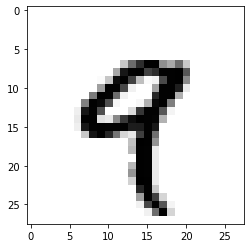

In [37]:
import matplotlib.pyplot as plt
plt.imshow(digito,cmap=plt.cm.binary)
plt.show()

El siguiente código toma las imágenes de la 10 a la 100 (sin incluir la 100).

In [38]:
corte = imagenes_entrenamiento[10:100]

In [39]:
corte.shape

(90, 784)

### La noción de lotes de datos (_batches_)

Cada vez más a menudo, los datasets son tan sumamente grandes que no es factible mostrar todo el dataset al algoritmo que se está entrenando. Para paliar este problema se utilizan lo que se conocen como _lotes de datos_ o _batches_.

### Ejemplos reales de tensores
La mayoría de datos con los que se trabajan en la actualidad encajan en uno de los siguientes tipos de tensores:
- Datos vectoriales: tensores 2D con la forma (muestras, descriptores).
- Series de datos o series temporales: tensores 3D con la forma (muestras, pasos, descriptores).
- Imágenes: tensores 4D con la forma (muestras, filas, columnas, canales).
- Vídeos: tensores 5D con la forma (muestras, frames, filas, columnas, canales). 

## Operaciones sobre tensores

Todas las operaciones que se producen en una red neuronal se pueden reducir a un pequeño conjunto de operaciones sobre tensores. 

En nuestro ejemplo inicial, estabamos construyendo una red apilando capas. Una capa de Keras tiene la forma:

```python
keras.layers.dense(512,activation='relu',input_shape=(28*28,))
```

Esta capa se puede interpretar como una función que toma como entrada un tensor 2D con la forma (n_samples, 28*28) y devuelve otro tensor 2D con la forma (n_samples,512). En concreto, se tiene una función como la siguiente:

```python
output= relu(dot(W,input)+b)
```

En dicha función hay tres operaciones sobre tensores: un producto escalar (operación ```dot```) entre el tensor de entrada y un tensor llamado W que representa los pesos a aprender; una suma (operador ```+```) entre el tensor 2D resultante y un vector b; y, finalmente, una operación ```relu``` definida como ```relu(x) = max(x,0)```.

### Operaciones elemento a elemento

Las operaciones ```relu``` y la suma son operaciones elemento a elemento; es decir, operaciones que se aplican de manera independiente a cada entrada en los tensores. Esto significa que este tipo de operadores son altamente paralelizables.

En la librería Numpy, estas operaciones están optimizadas utilizando BLAS (Basic Linear Algebra Subprograms), que son rutinas eficientes de manipulación de tensores de bajo nivel, altamente paralelizadas y que están implementadas de manera habitual en C o Fortran. 

Así que en Numpy es muy rápido y sencillo realizar operaciones elemento a elemetno como se muestra a continuación.

In [40]:
x1 = np.array([[1,-2,3],[-4,5,-6],[7,-8,9]])
y1 = np.array([[1,1,1],[1,1,1],[1,1,1]])

Suma elemento a elemento:

In [41]:
x1+y1

array([[ 2, -1,  4],
       [-3,  6, -5],
       [ 8, -7, 10]])

Relu elemento a elemento:

In [42]:
np.maximum(x1,0.)

array([[1., 0., 3.],
       [0., 5., 0.],
       [7., 0., 9.]])

### Broadcasting

En un primer vistazo podemos pensar que una operación elemento a elemento que toma dos tensores (como la suma) fuerza a que ambos tensores tengan la misma forma. Sin embargo, hemos dicho anteriormente que estamos sumando un tensor 2D con un vector (tensor 1D). ¿Qué ocurre cuando la forma de los dos tensores a sumar es diferente?

Para resolver este problema, y siempre que no haya ambigüedad, el tensor pequeño se amplia (proceso conocido en inglés como _broadcasting_) para que tenga el tamaño del grande. Este es un proceso de dos pasos:
- Se añaden ejes al tensor pequeño para llegar al valor de ```ndim``` del tensor grande. 
- El tensor pequeño se repite a lo largo de estos ejes para llegar a completar la forma completa del tensor grande. 

Por ejemplo, veamos lo que ocurre si intentamos sumar un tensor 2D con un vector.

In [43]:
x1

array([[ 1, -2,  3],
       [-4,  5, -6],
       [ 7, -8,  9]])

In [44]:
y2 = [1,0,0]

In [45]:
x1+y2

array([[ 2, -2,  3],
       [-3,  5, -6],
       [ 8, -8,  9]])

##### Ejercicio
¿Cómo se ha ampliado el vector ```y2```?

In [46]:
# Duplicando los datos existentes en las 2 filas restantes
# Dando lugar a la matriz:
y2 = [[1,0,0], [1,0,0], [1,0,0]]

### El producto tensorial

El último ingrediente que necesitamos es el _producto tensorial_ (```dot```), que es la operación tensorial más común. Al contrario que las operaciones elemento a elemento, el producto tensorial combina las entradas de los tensores considerados. El producto tensorial entre dos matrices es simplemente el producto de matrices. 



In [47]:
np.dot(x1,y1)

array([[ 2,  2,  2],
       [-5, -5, -5],
       [ 8,  8,  8]])

## La optimazión basada en el gradiente

Como hemos visto, cada capa de la red neuronal que definimos al principio sirve para transformar sus datos de entrada utilizando la expresión:

```python
output=relu(dot(W,input)+b)
```

En dicha expresión, W y b son tensores que representan atributos de la capa. Estos tensores se conocen como pesos de la capa y contienen la información aprendida por la red gracias al entrenamiento. 

Inicialmente, estos tensores se rellenan con pequeños valores aleatorios, y dichos valores se van ajustando de manera gradual gracias al feedback producido por la red. Este ajuste gradual es lo que se conoce como entrenamiento. 

Dicho ajuste ocurre en lo que se conoce como bucle de entrenamiento que consta de los siguientes pasos:
1. Coger un lote de ejemplos de entrenamiento x y sus correspondientes objetivos y.
2. Pasar los datos de entrenamiento a través de la red (en un paso que se conoce como _paso hacia adelante_  o _forward pass_) y obtener predicciones y_pred. 
3. Calcular la pérdida de la red en el lote y medir el desfase entre y e y_pred.
4. Actualizar los pesos de la red de manera que se reduzca poco a poco la pérdida en el lote. 

De este modo se consigue una red que tiene una pérdida pequeña en los datos de entrenamiento. La red aprende de este modo una función que asigna a las entradas la salida correcta. Esto que parece magia no lo es tanto cuando se mira en detalle cada paso. 

El paso 1 es simplemente una operación de rebanado. Los pasos 2 y 3 consiste en aplicar una serie de operaciones tensoriales. La única parte difícil es el paso 4: actualizar los pesos de la red. Para resolver este paso se utilizan derivadas. 

### ¿Qué es una derivada?

Considerar una función continua y suave $f(x)=y$ que asigna a un número real $x$ un nuevo número real $y$. Debido a que la función es continua, un pequeño cambio en $x$ produce un pequeño cambio en $y$. Digamos que incrementamos $x$ por un pequeño factor $\epsilon_x$, esto produce un pequeño $\epsilon_y$ que cambia $y$:
$$f(x+\epsilon_x)=y+\epsilon_y$$

Debido a que la función es suave (es decir que no hay ángulos abruptos), cuando $\epsilon_x$ es lo suficientemente pequeño cerca de un punto $p$ es posible aproximar $f$ como una función linear de pendiente $a$ de manera que $\epsilon_y$ se convierte en $a \times \epsilon_x$:
$$f(x+\epsilon_x)=y+a\times \epsilon_x$$

Esta aproximación sólo es válida cuando $x$ está lo suficientemente cerca de $p$. La pendiente $a$ es lo que se conoce como _derivada_ de $f$ en $p$. Si $a$ es negativa, significa que un pequeño cambio positivo de $x$ cerca de $p$ supone que $f(x)$ disminuye; en cambio, si $a$ es positivo, significa que un pequeño cambio positivo de $x$ cerca de $p$ supone que $f(x)$ aumenta. Esto se puede ver en la siguiente imagen.

<img src="https://github.com/IA1920/Images/blob/master/images/derivada.png?raw=1">

Además el valor absoluto de $a$ nos indica cómo de rápido sucede dicho incremento o decremento. 

Para toda función diferenciable $f(x)$ (donde diferenciable significa que puede ser derivada), existe una función derivada $f'(x)$ que asigna valores de $x$ a la pendiente de la aproximación local lineal de $f$ en esos puntos. Por ejemplo, la deriva del $cos(x)$ es $-seno(x)$, la derivada de $f(x)=ax$ es $f'(x)=a$.

Si estamos intentando actualizar $x$ por un factor $\epsilon_x$ con el objetivo de minimizar $f$, y se conoce la derivada de $f$, entonces la derivada de $f$ describe de manera completa como evolucion $f(x)$ al cambiar $x$. Si queremos reducir el valor de $f(x)$ solo tenemos que mover $x$ un poco en la dirección contraria. 

### El gradiente: la derivada de un tensor

El _gradiente_ es la derivada de una operación tensorial; en concreto, el gradiente es la generalización del concepto de derivadas a funciones con múltiples entradas.

Considerar un vector de entrada ```x```, una matriz ```W```, un objetivo ```y``` y una función de pérdida ```loss```. Se puede usar ```W``` para calcular un candidato ```y_pred``` y calcular la pérdida entre el resultado obtenido ```y_pred``` y el resultado esperado ```y```:

```python
y_pred = dot(W,x)
valor_perdida = loss(y_pred,y)
```

Si los datos de entrada ```x``` e ```y``` son fijos, el código anterior se puede interpretar como una función que asigna valores de ```W``` a valores de pérdida:

```python
valor_perdida = f(W)
```

Supongamos que el valor de ```W``` es inicialmente ```W0```, entonces la derivada de ```f``` en el punto ```W0``` es un tensor ```gradient(f)(W0)``` con la misma forma que ```W```, donde cada coeficiente ```gradient(f)(W0)[i,j]``` indica la dirección y magnitud del cambio en ```valor_perdidad``` cuando modificamos ```W0[i,j]```. El tensor ```gradient(f)(W0)```es el gradiente de la función ```f(W)``` en ```W0```. 

Hemos visto anteriormente que el valor de una derivada de una función ```f(x)``` con un único coeficiente pude interpretarse como la pendiente de la curva de ```f```. Del mismo modo ```gradient(f)(W0)``` puede interpretarse como un tensor que describe la _curvatura_ de ```f(W)``` alrededor de ```W0```. 

Es por esto que del mismo modo que pra una función ```f(x)``` se puede reducir el valor de ```f(x)``` moviendose un poco en la dirección opuesta a la derivada; con una función ```f(W)``` de un tensor, se puede reducir ```f(W)``` moviendo ```W``` en la dirección opuesta al gradiente; por ejemplo, ```W1=W0-step*gradient(f)(W0)```. Esto significa ir en contra de la curvatura, que intuitivamente debería ponerte más abajo en la curva. Notar que hay un factor de escala ```step``` que es necesario dado que ```gradient(f)(W0)``` solo aproxima la curvatura cuando estamos cerca de ```W0```, de modo que no nos vayamos demasiado lejos de ```W0```. 


### Descenso de gradiente estocástico

Dada una función diferenciable, es posible encontrar, al menos de manera teórica, su mínimo de manera analítica: se sabe que el mínimo de una función es un punto donde su derivada es 0, por lo tanto lo único que hay que hacer es encontrar todos los puntos de la función donde la derivada es 0 y comprobar cual de esos puntos tiene el valor más bajo.

Aplicado a las redes neuronales, esto significa encontrar de manera analítica la combinación de pesos que produce el menor valor de pérdida. Esto se puede hacer resolviendo la ecuación ```gradient(f)(W)=0``` para ```W```. Esto no es en general posible debido a la cantidad de parámetros (miles e incluso millones) que tienen las redes neuronales actuales. 

En su lugar, se puede llevar a cabo el algoritmo de cuatro pasos que indicamos al principio de esta sección que basicamente consiste en modificar poco a poco los parámetros basándonos en el valor actual de pérdidad producido en un lote aleatorio de instancias. Dado que estamos trabajando siempre con funciones diferenciables, es posible calcular el gradiente, lo que proporciona un modo eficiente de implementar el paso 4 del algoritmo. Si se actualizan los pesos en la dirección contraria al gradiente, la pérdida será cada vez más pequeña. En concreto el proceso se puede definir con los siguientes pasos:

1. Tomar un lote de instancias de entrenamiento ```x``` y sus correspondientes objetivos ```y```.
2. Pasar por la red ```x``` para obtener las predicciones ```y_pred```.
3. Calcular la pérdida de la red en el lote (medir el error entre ```y_pred``` e ```y```).
4. Calcular el gradiente de la pérdida con respecto a los parámetros de la red (un _paso hacia atrás_).
5. Mover los parámetros un poco en la dirección opuesta al gradiente de modo que se reduzca la pérdida en el lote un poco. 

Esto que acabamos de describir se conoce como _descenso de gradiente estocástico en mini-lotes_ o en inglés _mini-batch stochastic gradient descent_ (mini SGD). El término estocástico se refiere al hecho de que cada lote de datos es tomado de manera aleatoria. La siguiente figura ilustra lo que ocurre en dimensión 1 cuando la red sólo tiene un parámetro.

<img src="https://github.com/IA1920/Images/blob/master/images/sgd.png?raw=1">

Como se puede ver en la figura anterior es necesario elegir un valor razonable para el factor ```step```. En caso de ser muy pequeño el descenso en la curva puede llevar muchas iteraciones, y se podía quedar encallado en un mínimo local. Si el valor de ```step``` es demasiado grande, las actualizaciones pueden llevar a posiciones completamente aleatorias en la curva.

Una variante del algoritmo mini SGD consiste en tomar una única instancia en cada iteración en lugar de un lote de instancias. Esto es lo que se conoce como _verdadero SGD_. También se puede ir al otro extremo y coger todo el dataset como lote, a lo que se conoce como _batch SGD_. En el _verdadero SGD_ las actualizaciones serán poco precisas pero serán muy rápidas, por el contrario en _batch SGD_ cada actualización será más precisa pero también mucho más costosa. La solución es tomar un valor razonable de mini-lotes. 

De manera adicional a las variantes de SGD, existen otras alternativas como Adagrad o RMSProp. A dichas alternativas se las conoce como _métodos de optimización_ u _optimizadores. 


### Encadenando derivadas: el algoritmo de propagación hacia atrás

En el algoritmo previo hemos asumido que si una función es diferenciable, podemos calcular de manera sencilla su derivada. En la práctica, una función de una red neuronal consiste en muchas operaciones tensoriales encadenadas donde cada una de ellas tiene una derivada simple y conocida.

Por ejemplo, considerar la siguiente red compuesta de tres operaciones tensoriales $a$, $b$ y $c$ con matrices de pesos conocidas $W_1$, $W_2$ y $W_3$:
$$f(W_1,W_2,W_3)=a(W_1,b(W_2,c(W_3)))$$

El Análisis matemático nos dice que tal encadenamiento de funciones puede ser derivado utilizando la regla de la cadena:
$$f(g(X))=f'(g(x))\times g'(x)$$

Al aplicar la regla de la cadena al cálculo de los valores del gradiente de una red neuronal se obtiene un algoritmo llamado de __propagación hacia atrás__ (en inglés _backpropagation_). El algoritmo de propagación hacia atrás comienza con el valor de pérdida final y trabaja hacia atrás en las capas superiores y desde las capas inferiores aplicando la regla de la cadena para calcular la contribución que tiene cada parámetro en el cálculo de la perdida. 

## Volviendo a nuestro primer ejemplo

Ahora podemos revisar lo que hacíamos en nuestro ejemplo inicial comprendiendo las distintas operaciones que estamos realizando.

Primero tenemos nuestros datos de entrada:

In [48]:
from keras.datasets import mnist
(imagenes_entrenamiento,etiquetas_entrenamiento),(imagenes_test,etiquetas_test) = mnist.load_data()
imagenes_entrenamiento = imagenes_entrenamiento.reshape((60000,28*28))
imagenes_entrenamiento = imagenes_entrenamiento.astype('float32')/255
imagenes_test = imagenes_test.reshape((10000,28*28))
imagenes_test = imagenes_test.astype('float32')/255
etiquetas_entrenamiento = to_categorical(etiquetas_entrenamiento)
etiquetas_test = to_categorical(etiquetas_test)

Ahora se puede comprender que las imágenes de entrada se almacenan en tensores, que tienen la forma (60000,784) para el conjunto de entrenamiento, y (10000,784) para el conjunto de test. 

Nuestra red venía dada del siguiente modo:

In [49]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

Ahora queda claro que la red consta de dos capas enlazadas, que cada capa aplica una serie de operaciones tensoriales a los datos de entrada y que estas operaciones involucran pesos (que son tensores). Los tensores peso, que son atributos de la red, es donde el _conocimiento_ de la red persiste. 

Lo siguiente que hicimos fue compilar la red:

In [50]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Esto significa que ```categorical_crossentropy``` es la función de pérdida que usamos para dar feedback a la red de manera que los pesos tensoriales aprendan, y que en la fase de entrenamiento se intenta minimizar. Este proceso de reducción de la pérdida ocurre gracias al desceso de gradiente estocástico usando mini-lotes. Las reglas exactas que gobiernan el descenso de gradiente quedan definidas en el optimizador ```rmsprop```.

Finalmente, teníamos el bucle de entrenamiento que se itera 5 veces (cada iteración sobre el conjunto de entrenamiento se conoce como _época_, en inglés _epoch_) utilizando mini-lotes de tamaño 128. En cada iteración, la red calcula los gradientes de los pesos con respecto a la pérdida del lote, y actualiza los pesos de la manera adecuada. 

In [51]:
network.fit(imagenes_entrenamiento,etiquetas_entrenamiento,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2554 - accuracy: 0.9267
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1030 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0681 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0491 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0370 - accuracy: 0.9892


Lo que hemos visto en este notebook son los conceptos básicos que forman parte de una red neuronal. 

## Entrega

Recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File.